> # **spaCy based complete pipeline**
1. loading data
2. sentence splitting
3. word tokenization
4. vocabulary size
5. remove the noise
6. zipf's law visualization
7. stopword impact analysis

In [1]:
!pip install -U spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 126.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
import spacy
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

# disable heavy components for speed
nlp = spacy.load("en_core_web_sm", disable=["ner", "parse"])

> ***Loading the Datasest Using HuggingFace***

1. (load_dataset("aclImdb"))
2. Automatically downloads
3. Automatically extracts
4. Automatically splits train/test
5. Stores in efficient Arrow format
6. No manual file handling

In [3]:
pip install datasets

In [5]:
from datasets import load_dataset

dataset = load_dataset("imdb")

text_train = dataset["train"]["text"]
y_train = dataset

README.md: 0.00B [00:00, ?B/s]

plain_text/train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

plain_text/test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

plain_text/unsupervised-00000-of-00001.p(…):   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

> ***Process Entire Dataset***

1. use nlp.pipe()

In [6]:
docs = list(nlp.pipe(text_train, batch_size=500))

> ***Sentence Splitting***

In [7]:
sentences = []

for doc in docs:
    for sent in doc.sents:
        sentences.append(sent.text)

print("Total sentences:", len(sentences))
print("Sample sentences:", sentences[:3])

Total sentences: 305311
Sample sentences: ['I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967.', 'I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life.', 'In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States.']


> ***Word Tokenization***

In [8]:
raw_tokens = []

for doc in docs:
    for token in doc:
        raw_tokens.append(token.text.lower())

print("Total raw tokens:", len(raw_tokens))
print("Sample tokens:", raw_tokens[:20])

Total raw tokens: 6811547
Sample tokens: ['i', 'rented', 'i', 'am', 'curious', '-', 'yellow', 'from', 'my', 'video', 'store', 'because', 'of', 'all', 'the', 'controversy', 'that', 'surrounded', 'it', 'when']


> ***Vocabulary Size***

In [9]:
raw_vocab = set(raw_tokens)
print("Raw vocabulary size:", len(raw_vocab))

Raw vocabulary size: 101164


> ***Zipf's Law Visualization***

1. You should observe near-linear behavior in log-log scale


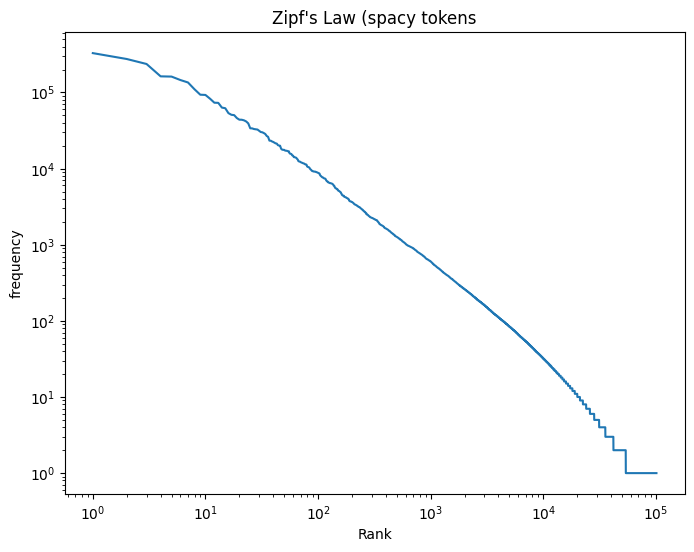

In [11]:
raw_freq = Counter(raw_tokens)

sorted_freq = raw_freq.most_common()

ranks = np.arange(1, len(sorted_freq) +1)
frequencies = np.array([freq for _, freq in sorted_freq])

plt.figure(figsize=(8,6))
plt.loglog(ranks, frequencies)
plt.title("Zipf's Law (spacy tokens")
plt.xlabel("Rank")
plt.ylabel("frequency")
plt.show()

> ***Stopword Impact Analysis***

In [12]:
stopword_tokens = [token.text.lower() for doc in docs for token in doc if token.is_stop]

print("Total tokens:", len(raw_tokens))
print("Stopword count:", len(stopword_tokens))
print("stopword ratio:", len(stopword_tokens)/len(raw_tokens))

Total tokens: 6811547
Stopword count: 3265850
stopword ratio: 0.4794578970092991


**Cleaning (Remove Noise + Stopwords)**

> Rules:
1. Keep alphabetic tokens
2. Remove stopwords
3. Remove length ≤ 2

In [13]:
clean_tokens = [
    token.text.lower()
    for doc in docs
    for token in doc
    if token.is_alpha
       and not token.is_stop
       and len(token.text) > 2
]

clean_freq = Counter(clean_tokens)

print("Clean token count:", len(clean_tokens))
print("Clean vocabulary size:", len(set(clean_tokens)))


Clean token count: 2510259
Clean vocabulary size: 71526


**Before vs After Comparison**

>**Top 20 Before Cleaning**

In [14]:
print("Top 20 BEFORE cleaning:")
print(raw_freq.most_common(20))

Top 20 BEFORE cleaning:
[('the', 328828), (',', 275296), ('.', 236709), ('and', 162888), ('a', 161730), ('of', 145596), ('to', 135355), ('is', 110135), ('it', 93487), ('in', 92823), ('i', 82706), ('this', 73412), ('that', 73060), ('"', 63332), ("'s", 62111), ('-', 53554), ('/><br', 50935), ('was', 50375), ('as', 46161), ('for', 43937)]


> **Top 20 After Cleaning**

In [15]:
print("Top 20 AFTER cleaning:")
print(clean_freq.most_common(20))

Top 20 AFTER cleaning:
[('movie', 43063), ('film', 39285), ('like', 20100), ('good', 14905), ('time', 12343), ('story', 11727), ('people', 9142), ('bad', 9119), ('great', 8931), ('way', 7825), ('movies', 7506), ('think', 7244), ('characters', 7021), ('character', 6927), ('watch', 6773), ('films', 6760), ('seen', 6572), ('plot', 6452), ('life', 6440), ('little', 6417)]


**Frequency Visualization Comparison**
> Before

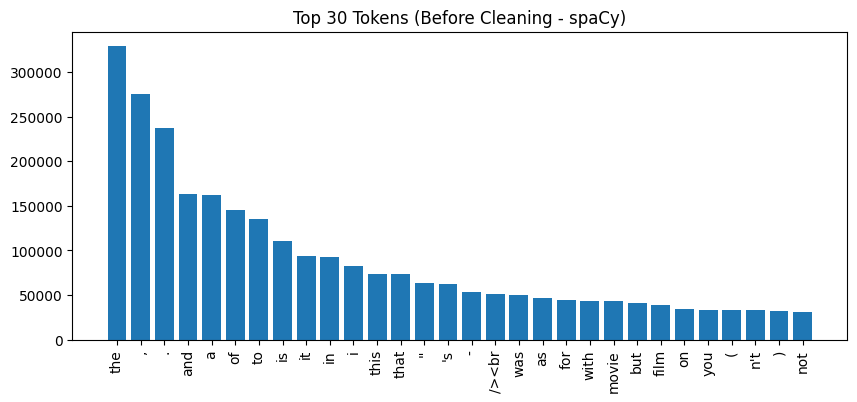

In [16]:
before_common = raw_freq.most_common(30)
words_before = [w[0] for w in before_common]
counts_before = [w[1] for w in before_common]

plt.figure(figsize=(10,4))
plt.bar(words_before, counts_before)
plt.xticks(rotation=90)
plt.title("Top 30 Tokens (Before Cleaning - spaCy)")
plt.show()


> After

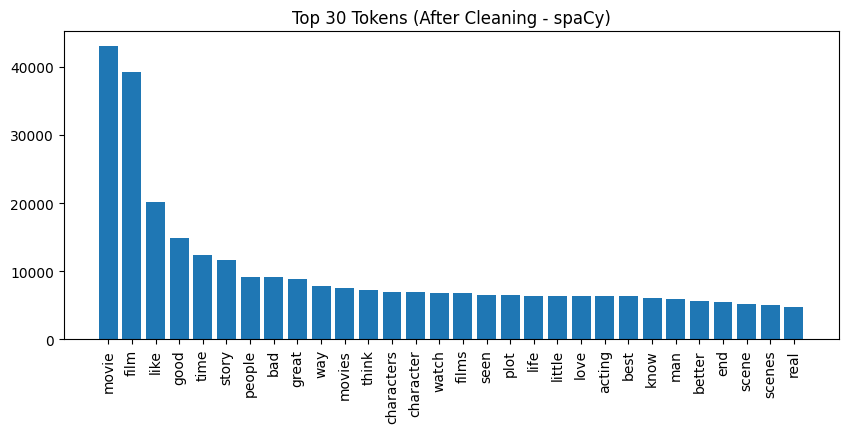

In [17]:
after_common = clean_freq.most_common(30)
words_after = [w[0] for w in after_common]
counts_after = [w[1] for w in after_common]

plt.figure(figsize=(10,4))
plt.bar(words_after, counts_after)
plt.xticks(rotation=90)
plt.title("Top 30 Tokens (After Cleaning - spaCy)")
plt.show()


> Length Distribution (Document Level)

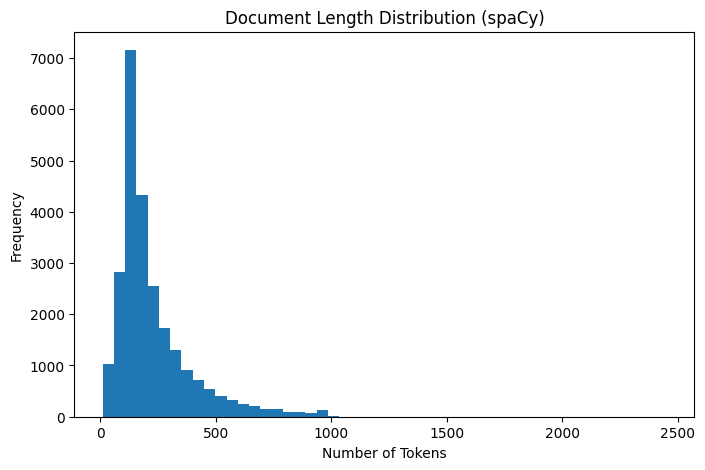

In [18]:
doc_lengths = [
    len([token for token in doc if token.is_alpha])
    for doc in docs
]

plt.figure(figsize=(8,5))
plt.hist(doc_lengths, bins=50)
plt.title("Document Length Distribution (spaCy)")
plt.xlabel("Number of Tokens")
plt.ylabel("Frequency")
plt.show()
